Debugging of the strange 11 GeV peak in the pT spectrum of reconstructed muons, *without* gen matching. This peak was the same regardless of which mass parameters we chose, so clearly it wasn't due to the iDM physics. After email exchange with Juliette Alimena, developer of the displaced StandAlone muon collection, we found out that the issue is due to the cosmic seed which is used by dSA. This seed has a fixed pT cut-off of 10 GeV, and while it is not the only seed used (hence why we can reconstruct softer muons than that), when it does become active around 10 GeV it introduces this spurious peak which are not from iDM events (I'm still not sure what these muons actually are). In any case, we can remove the strange peak by requiring some basic track quality cuts on the reconstructed muons, still without gen matching. The cuts are: min # of muon stations: 2, min # of hits in total: 12, and max chi2 of track fitting: 10. This removes the peak while only slightly reducing our overall efficiency.

In [1]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

Welcome to JupyROOT 6.12/04


In [2]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [3]:
Mchi='52p5'
genInfo = OrderedDict({})
genInfo[Mchi] = uproot.open('../Firefighter/washAOD/Mchi-52p5_dMchi-5p0_ctau-10_peakDebug.root')['GEN/gen'].pandas.df()
dfs = OrderedDict({})
dfs[Mchi] = uproot.open('../Firefighter/washAOD/Mchi-52p5_dMchi-5p0_ctau-10_peakDebug.root')['SREffi_dsa/cut0'].pandas.df()

Plot the pT spectrum of reco muons that pass the gen matching (blue) vs all reco muons (orange)

(array([    8.,    34.,   148.,   586.,  1204.,  1682.,  2095.,  2161.,
         2043.,  1876.,  1837.,  1531.,  1328.,  1154.,   978.,   797.,
          670.,   578.,   488.,   409.,   353.,   310.,   264.,   237.,
          198.,   220.,   221.,   263.,   320.,   234.,   185.,   149.,
          142.,   122.,    91.,    83.,    49.,    39.,    31.,    36.,
           27.,    33.,    25.,    24.,    21.,    16.,    18.,    14.,
           16.,     8.]),
 array([  0. ,   0.4,   0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,
          3.6,   4. ,   4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,
          7.2,   7.6,   8. ,   8.4,   8.8,   9.2,   9.6,  10. ,  10.4,
         10.8,  11.2,  11.6,  12. ,  12.4,  12.8,  13.2,  13.6,  14. ,
         14.4,  14.8,  15.2,  15.6,  16. ,  16.4,  16.8,  17.2,  17.6,
         18. ,  18.4,  18.8,  19.2,  19.6,  20. ]),
 <a list of 1 Patch objects>)

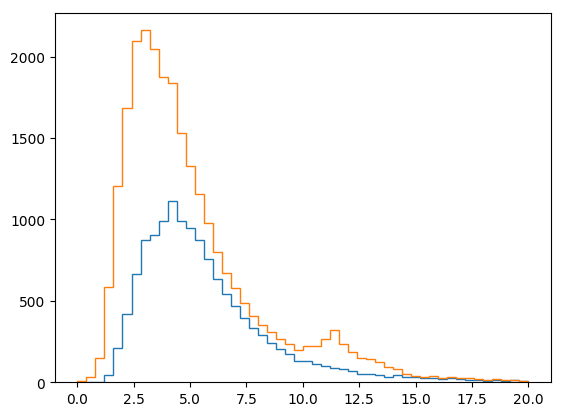

In [5]:
testdf=genInfo['52p5'].query('pid==13|pid==-13')[['pt','eta','phi']]#.groupby(level=0)[['pt','eta']].max()
df1=testdf.loc[testdf.groupby(level=0)['pt'].idxmax()]
testdf2=dfs['52p5'].dropna()[['recoPt','recoEta','recoPhi']]#.groupby(level=0).max()
df2=testdf2.loc[testdf2.groupby(level=0)['recoPt'].idxmax()]

resdf=pd.concat([df1.reset_index(level='subentry',drop=True),
           df2.reset_index(level='subentry',drop=True)], axis=1)
np.sqrt((resdf['recoEta']-resdf['eta'])**2 + (resdf['recoPhi']-resdf['phi'])**2).dropna()

plt.hist(resdf.query('((recoEta-eta)**2 + (recoPhi-phi)**2)**(1/2) < 0.3')['recoPt'],bins=50,range=(0,20),histtype='step')
plt.hist(resdf.dropna()['recoPt'],bins=50,range=(0,20),histtype='step')

In [112]:
mytest=dfs[Mchi]['fired'].copy()#.loc[(dfs[Mchi]['fired']>0, slice(None)), :]#=dfs[Mchi].loc[(slice(None), 0), 'fired']#dfs[Mchi]['fired']>0]
mytest=mytest.mean(level=0)
dfs[Mchi]

fired     recoPt   recoEta   recoPhi     recoDxy      recoDz  \
entry  subentry                                                                 
0      0           0.0        NaN       NaN       NaN         NaN         NaN   
       1           NaN        NaN       NaN       NaN         NaN         NaN   
       2           NaN        NaN       NaN       NaN         NaN         NaN   
1      0           0.0   1.906168 -1.349540 -2.663009  264.624847 -208.747452   
2      0           0.0        NaN       NaN       NaN         NaN         NaN   
       1           NaN        NaN       NaN       NaN         NaN         NaN   
       2           NaN        NaN       NaN       NaN         NaN         NaN   
       3           NaN        NaN       NaN       NaN         NaN         NaN   
3      0           0.0   1.731408  2.117415  2.267153   25.319313   10.737752   
       1           NaN  11.703406  1.401388  1.821786  -48.707172 -167.272705   
       2           NaN        NaN       NaN       NaN         NaN         NaN   
4      0           0.0        NaN       NaN       NaN         NaN         NaN   
       1           NaN        NaN       NaN       NaN         NaN         NaN   
       2           NaN        NaN       NaN       NaN         NaN         NaN   
       3           NaN        NaN       NaN       NaN         NaN         NaN   
       4           NaN        NaN       NaN       NaN         NaN         NaN   
       5           NaN        NaN       NaN       NaN         NaN         NaN   
       6           NaN        NaN       NaN       NaN         NaN         NaN   
5      0           0.0        NaN       NaN       NaN         NaN         NaN   
       1           NaN        NaN       NaN       NaN         NaN         NaN   
       2           NaN        NaN       NaN       NaN         NaN         NaN   
       3           NaN        NaN       NaN       NaN         NaN         NaN   
       4           NaN        NaN       NaN       NaN         NaN         NaN   
6      0           0.0        NaN       NaN       NaN         NaN         NaN   
       1           NaN        NaN       NaN       NaN         NaN         NaN   
       2           NaN        NaN       NaN       NaN         NaN         NaN   
       3           NaN        NaN       NaN       NaN         NaN         NaN   
       4           NaN        NaN       NaN       NaN         NaN         NaN   
       5           NaN        NaN       NaN       NaN         NaN         NaN   
7      0           0.0   3.030982  0.679527  0.456549   -4.681913  217.882080   
...                ...        ...       ...       ...         ...         ...   
129150 3           NaN        NaN       NaN       NaN         NaN         NaN   
       4           NaN        NaN       NaN       NaN         NaN         NaN   
       5           NaN        NaN       NaN       NaN         NaN         NaN   
       6           NaN        NaN       NaN       NaN         NaN         NaN   
       7           NaN        NaN       NaN       NaN         NaN         NaN   
       8           NaN        NaN       NaN       NaN         NaN         NaN   
       9           NaN        NaN       NaN       NaN         NaN         NaN   
       10          NaN        NaN       NaN       NaN         NaN         NaN   
       11          NaN        NaN       NaN       NaN         NaN         NaN   
       12          NaN        NaN       NaN       NaN         NaN         NaN   
       13          NaN        NaN       NaN       NaN         NaN         NaN   
       14          NaN        NaN       NaN       NaN         NaN         NaN   
       15          NaN        NaN       NaN       NaN         NaN         NaN   
       16          NaN        NaN       NaN       NaN         NaN         NaN   
       17          NaN        NaN       NaN       NaN         NaN         NaN   
       18          NaN        NaN       NaN       NaN         NaN         NaN   
129151 0           0.0        NaN       NaN     

In [89]:
dfs[Mchi]['fired']>0

entry   subentry
0       0           False
        1           False
        2           False
1       0           False
2       0           False
        1           False
        2           False
        3           False
3       0           False
        1           False
        2           False
4       0           False
        1           False
        2           False
        3           False
        4           False
        5           False
        6           False
5       0           False
        1           False
        2           False
        3           False
        4           False
6       0           False
        1           False
        2           False
        3           False
        4           False
        5           False
7       0           False
                    ...  
129150  3           False
        4           False
        5           False
        6           False
        7           False
        8           False
        9           F